In [423]:
#initialization of basic function
import numpy as np
import matplotlib.pyplot as plt
import csv
import datetime

MAX_RANGE = 10000
MAX_VELUE_V_GRAPH = 200
Q_OPEN  = 0
Q_CLOSE = 3
Q_HIGH  = 1
Q_LOW   = 2
Q_VOL   = 4
RANGE_OF_QUOTES_IN_DAY = 54

In [451]:
#input data
quotes = []
datetime_q = []

with open('C:\\Python\\trade\\SPFB15Mo.txt','r') as f:
    read_quotes = csv.reader(f)
    for row in read_quotes:
        quotes.append([float(x) for x in row[4:9]])
        datetime_q.append(datetime.datetime(int(row[2][:4]),
                                            int(row[2][4:6]),
                                            int(row[2][6:]),
                                            int(row[3][:2]),      rang_of_row = len(quotes)
    f.close()
    
    print(quotes[0], '\t', datetime_q[0])
    print(quotes[1], '\t', datetime_q[1])
    print(" *******  *******  *******  *******  ******* ")
    print(quotes[-1], '\t', datetime_q[-1])

[60480.0, 64945.0, 60480.0, 62370.0, 10287.0] 	 2009-01-11 10:30:00
[62325.0, 62705.0, 61935.0, 62285.0, 5523.0] 	 2009-01-11 10:45:00
 *******  *******  *******  *******  ******* 
[126270.0, 126280.0, 126160.0, 126180.0, 1769.0] 	 2020-08-31 23:30:00


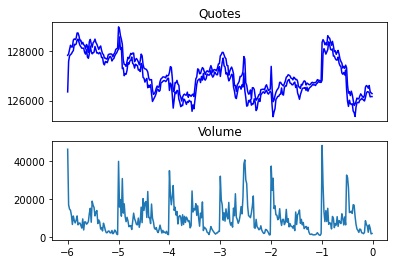

6


In [472]:
#The output of quotations in the form of graphs
LAST_TF = 54 * 6
delta_day = (datetime_q[-1] - datetime_q[-LAST_TF]).days -1
fig, gr = plt.subplots(2)
gr[0].set_title('Quotes')
gr[0].set_xticks([])
gr[1].set_title('Volume')
gr[0].plot([x[Q_HIGH] for x in quotes[-LAST_TF:]],'b')
gr[0].plot([x[Q_LOW]  for x in quotes[-LAST_TF:]],'b')
gr[1].plot([x * delta_day / LAST_TF for x in range(-LAST_TF,0)],[x[Q_VOL]  for x in quotes[-LAST_TF:]])
plt.show()
print(delta_day)

In [498]:
#Trading function 

def one_two_bay(index: int, *arg:float) -> float:
    """
    index - current time frame
    arg   - DIF_BR
    
    Select barrier as a maximum of two predicted time intervals.
    If the closing price is more barrier + DIF_BR, then we buy.
    If the price is less than the barrier, then we sell.
    """
    dif_br = arg[0]
    result = 0.5
    if index > 2:
        max_q = max(quotes[index - 1][Q_HIGH], quotes[index - 2][Q_HIGH])
        if (quotes[index][Q_CLOSE] > (max_q + dif_br) and
           (datetime_q[index].hour * 60 + datetime_q[index].minute) > arg[1]):
            result = 1.0
        if (quotes[index][Q_CLOSE] < max_q):
            result = 0.0
    return result

{'final': 1.3776568992004058e-27, 'trans': 11096}


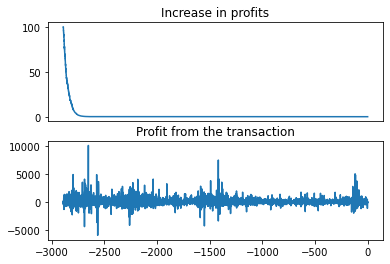

In [499]:
#Checking the trading function for the entire archive 

#DIF_BREACK = 780 #Difference from a line stop
DIF_BREACK = 100 #Difference from a line stop
BEGIN_MIN = 30
SLIPPAGE = 0.006
curent_profit      = np.zeros(len(quotes), dtype=float) #Growing profit 
curent_transaction = np.zeros(len(quotes), dtype=float) #Profit from one lot deal

def culc_profit(func_bay, *arg) -> float:
    """
    func_bay - checking function
    *arg     - additional arguments 
    Calculate the profit the algorithm  
    """
    amount_mony = 100.0
    amount_action = 0.0
    price_bay = 0.0
    result = {'final':0, 'trans':0}
    
    for i in range(len(quotes)):
        m_decision = func_bay(i,*arg)
        
        #buy
        if amount_mony > 0 and m_decision > 0.8:
            amount_action += amount_mony / quotes[i][Q_CLOSE]
            amount_mony = 0.0
            price_bay = quotes[i][Q_CLOSE]
            result['trans'] += 1
        
        #sale
        if amount_action > 0 and m_decision < 0.2:
            curent_transaction[i] = quotes[i][Q_CLOSE] - price_bay
            amount_mony += amount_action * quotes[i][Q_CLOSE] * (1 - SLIPPAGE)
            amount_action = 0.0

            
        curent_profit[i] = amount_mony + amount_action * quotes[i][Q_CLOSE]

    result['final'] = amount_mony + amount_action * quotes[len(quotes) - 1][Q_CLOSE]
    return result
    

#test function    
     
print(culc_profit(one_two_bay, DIF_BREACK, BEGIN_MIN))

figf, gr = plt.subplots(2)
gr[0].set_title('Increase in profits')
gr[1].set_title('Profit from the transaction')
gr[0].set_xticks([])
gr[0].plot(curent_profit)
#gr[1].plot([2020 + i/365.25/RANGE_OF_QUOTES_IN_DAY for i in range(-len(quotes), 0)], curent_transaction)
gr[1].plot([i/RANGE_OF_QUOTES_IN_DAY for i in range(-len(quotes), 0)], curent_transaction)
plt.show()

In [500]:
#Search for arguments

print('const\tfinal\ttrans')
for x in range(0,1000,20):
    a = culc_profit(one_two_bay, x ,BEGIN_MIN)
    print(f"{x}\t{int(a['final'])}\t{a['trans']}")

const	final	trans
0	0	18540
20	0	16781
40	0	15200
60	0	13581
80	0	12297
100	0	11096
120	0	9953
140	0	8996
160	0	8185
180	0	7446
200	0	6786
220	0	6158
240	0	5614
260	0	5086
280	0	4655
300	0	4273
320	0	3929
340	0	3598
360	0	3313
380	0	3048
400	0	2842
420	0	2616
440	0	2419
460	0	2224
480	0	2074
500	0	1920
520	0	1774
540	0	1662
560	0	1543
580	0	1422
600	0	1323
620	0	1236
640	0	1167
660	0	1084
680	0	1022
700	0	947
720	0	894
740	1	848
760	1	795
780	1	752
800	2	710
820	2	677
840	3	645
860	3	610
880	4	587
900	4	569
920	5	535
940	6	512
960	6	485
980	7	465


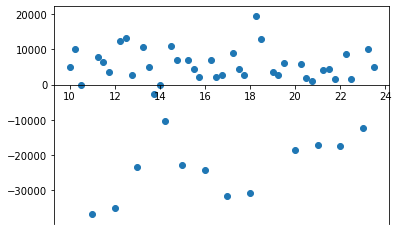

In [497]:
#Distribution of transactions within the day
distr_tr = {}

for i in range(len(quotes)):
    if curent_transaction[i] != 0:
        tr_daytime = datetime_q[i].hour * 60 + datetime_q[i].minute
        if tr_daytime in distr_tr:
            distr_tr[tr_daytime] += curent_transaction[i]
        else:
            distr_tr[tr_daytime] = curent_transaction[i]

plt.scatter([x/60 for x in distr_tr.keys()], distr_tr.values())
ax = plt.gca()
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
plt.show()


In [360]:

def sigmoid(x, der=False):
    if der:
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))

quotes_norm = np.dot(quotes,0.000006)
pr0 = np.zeros(14)
pr1 = np.zeros(5)
pr2 = np.zeros(3)
pr3 = np.zeros(1)


er1 = np.zeros(5)
er2 = np.zeros(3)
er3 = np.zeros(1)

# Сделаем случайные числа более определёнными
np.random.seed(2)

# Инициализируем веса случайным образом со средним 0
w01 = 2 * np.random.random((14, 5)) - 1
w12 = 2 * np.random.random((5, 3)) - 1
w23 = 2 * np.random.random((3, 1)) - 1

dw01 = np.zeros((14,5))
dw12 = np.zeros((5,3))


     

nu = 0.1 #коэф обучения

for iter in range(25):
    ma = 0
    for data_fr in range(len(quotes)-1):

        # Прямое распространение
        # 1 загружаем
        pr0[0:5] = quotes_norm[data_fr]
        pr0[5]  = 1.0
        pr0[6]  = pr2[0]
        pr0[7]  = pr2[1]
        pr0[8]  = pr2[2]
        pr0[9]  = pr1[0]
        pr0[10] = pr1[1]
        pr0[11] = pr1[2]
        pr0[12] = pr1[3]
        pr0[13] = pr1[4]
        # 2 распостраняем
        pr1 = np.dot(sigmoid(pr0), w01)
        pr2 = np.dot(sigmoid(pr1), w12)
        pr3 = np.dot(sigmoid(pr2), w23)
        if pr3[0] > ma: ma = pr3[0]

        # Насколько мы ошиблись?
        a = sigmoid((quotes[data_fr + 1][Q_CLOSE] - quotes[data_fr][Q_CLOSE])*0.01)
        e = a - sigmoid(pr3[0])
        er3[0] = e * sigmoid(pr3[0], True)

        #обратно распосстроням ошибку
        for r in range(3):
                er2[r] = np.dot(w23[r], er3) * sigmoid(pr2[r], True)

        for r in range(5):
                er1[r] = np.dot(w12[r], er2) * sigmoid(pr1[r], True)

        #корректируем веса
        for r in range(3):
                dw23[r] = nu * er3 * pr2[r]
                w23[r] = w23[r] + dw23[r]
                
        for r in range(5):
                dw12[r] = nu * er2 * pr1[r]
                w12[r] = w12[r] + dw12[r]

        for r in range(14):
                dw01[r] = nu * er1 * pr0[r]
                w01[r] = w01[r] + dw01[r]
        
    print(e,ma,a,er3[0])
    #print(er3[0],'\n')


0.11242955852126019 0 0.598687660112452 -0.00652140894333437
0.10707843276006318 0 0.598687660112452 -0.0037148650427542714
0.10465215717196746 0 0.598687660112452 -0.0025564824134343914
0.10326084506999045 0 0.598687660112452 -0.0019235319678223388
0.10235725419940506 0 0.598687660112452 -0.0015245194223018903
0.10172288410905245 0 0.598687660112452 -0.0012500165852385172
0.10125304129847712 0 0.598687660112452 -0.001049681726047844
0.10089118515822659 0 0.598687660112452 -0.0008971089431800647
0.10060406383849224 0 0.598687660112452 -0.0007771075064611506
0.10037082843688566 0 0.598687660112452 -0.0006803162817289929
0.10017773655608392 0 0.598687660112452 -0.0006006505690297947
0.10001535872491302 0 0.598687660112452 -0.0005339831606648764
0.09987700765410923 0 0.598687660112452 -0.0004774152912496681
0.0997578079046505 0 0.598687660112452 -0.0004288509574410338
0.09965412054005762 0 0.598687660112452 -0.00038673684343148713
0.09956317409079557 0 0.598687660112452 -0.000349897243590

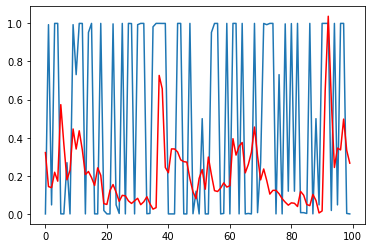

In [376]:
def new_tr_func(index: int, *arg) -> float:
    # Прямое распространение
    # 1 загружаем
    global pr0
    global pr1
    global pr2
    global pr3
    
    pr0[0:5] = np.dot(quotes[index],0.000006)
    pr0[6]  = pr2[0]
    pr0[7]  = pr2[1]
    pr0[8]  = pr2[2]
    pr0[9]  = pr1[0]
    pr0[10] = pr1[1]
    pr0[11] = pr1[2]
    pr0[12] = pr1[3]
    pr0[13] = pr1[4]
    # 2 распостраняем
    pr1 = sigmoid(np.dot(pr0, w01))
    pr2 = sigmoid(np.dot(pr1, w12))
    pr3 = sigmoid(np.dot(pr2, w23))
    return pr3[0]

plt.plot([sigmoid((quotes[x + 1][Q_CLOSE] - quotes[x][Q_CLOSE])*0.1) for x in range(100,200)])
#plt.plot([one_two_bay(x,DIF_BREACK) for x in range(len(quotes))],'g')
plt.plot([2000*(new_tr_func(x)-0.4982) for x in range(100,200)],'r')
plt.show()

In [484]:
datatime_q[0]

IndexError: list index out of range